<a href="https://colab.research.google.com/github/Binarybug-debug/Dynamics-/blob/main/Customizing%20with%20Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customizing Visualizations with Matplotlib

## Introduction

We had a quick introduction to plotting with `matplotlib` in previous lessons. This lesson covers plotting with Python and `matplotlib` using a more structured approach. In this section, we'll look into the components of standard Matplotlib plots used for creating and customizing visualizations. The lesson will also provide you with lots of example code to get you started with data visualization and customizations.

## Objectives

You will be able to:

* Create a line plot with Matplotlib
* Plot multiple graphs on the same axes
* Customize axes limits and ticks
* Customize line styles and colors
* Understand the distinction between Matplotlib figure and axes
* Create multiple subplots within a Matplotlib figure

Let's first import Matplotlib's `pyplot` module into our working environment along with `numpy` to create sample data.

In Jupyter notebooks, you can use `%matplotlib` magic with `inline` to show plots inside the notebook or `qt` for external/interactive plots. `inline` is recommended for most needs.

In [1]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Import numpy to generate some dummy data
import numpy as np
%matplotlib inline

We can use numpy's `linspace()` function to quickly generate some dummy data for visualizations.

In [3]:
years = range(1975, 2000)
# Create a numpy array of 25 values from 0 - 1000
data = np.linspace(0, 1000, 25)
data

array([   0.        ,   41.66666667,   83.33333333,  125.        ,
        166.66666667,  208.33333333,  250.        ,  291.66666667,
        333.33333333,  375.        ,  416.66666667,  458.33333333,
        500.        ,  541.66666667,  583.33333333,  625.        ,
        666.66666667,  708.33333333,  750.        ,  791.66666667,
        833.33333333,  875.        ,  916.66666667,  958.33333333,
       1000.        ])

As you can see, this code produced 25 equally spaced numbers from 0 to 1000.

## `matplotlib` Line Plot

Throughout this lesson we'll be using a new type of plot in our examples: a *line plot*.

### What Are Line Plots?

A line plot (or line graph) is a two-dimensional data visualization that is used to represent a trend. The x-axis should represent something that "increases" — either a time measure like seconds, hours, or years or an ordinal measure like finishing places in a competition (1st, 2nd, 3rd, etc.).

Line plots look kind of like scatter plots, except that each point is connected by a trend line.

### Line Plots in Matplotlib

The function to make a line plot in `matplotlib` is just `.plot()` ([documentation here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)). Let's plot our generated data and set a legend:

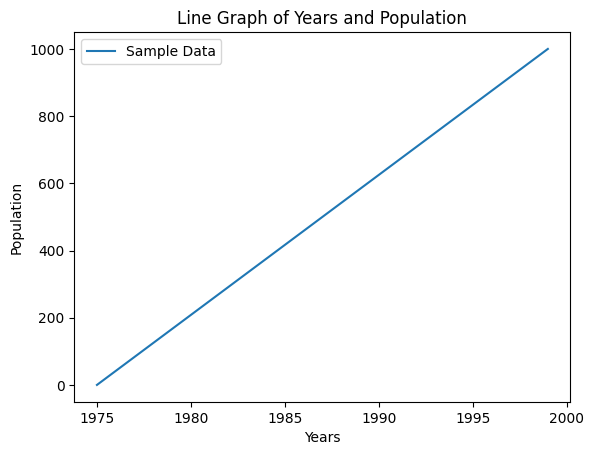

In [8]:
# Create the plot
fig, ax = plt.subplots()

# Use plot() function to create a plot using above values
ax.plot(years, data)

# Add a legend to the plot
ax.legend(["Sample Data"])
ax.set_xlabel("Years")
ax.set_ylabel("Population")
ax.set_title("Line Graph of Years and Population");

**Note:** Notice the semicolon at the end of the last line. If this is not included, the location in memory of the last object to be created in the graph can be displayed before the graph is displayed.

If you re-run the above cell without the semicolon, you may see something like `<matplotlib.legend.Legend at 0x120f17910>` displayed above the line graph. It doesn't interfere with the plot creation, but it can be distracting to someone reading your notebook.

In order to suppress this print statement, just include a semicolon at the end of the last line of a given visualization!

### Labelling the Plots

With a simple plot as shown above, `matplotlib` also allows users to provide context for the visual information by adding plot titles and labels for axes. The following functions can be used to achieve this:

 - **`ax.set_xlabel("text") / ax.set_ylabel("text")`**: define labels for x and y axes
 - **`ax.set_title("text")`**: define the plot title.

These functions can be used with the `.legend()` function as we just saw above to add a legend to the plot. The legend function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn.

 - `ax.legend(["text"], loc=1)`: upper right corner
 - `ax.legend(["text"], loc=2)`: upper left corner
 - `ax.legend(["text"], loc=3)`: lower left corner
 - `ax.legend(["text"], loc=4)`: lower right corner

Let's add some more information to the above plot using these functions below:

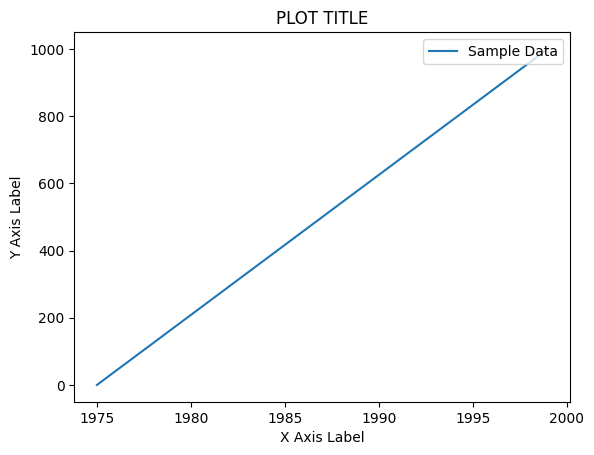

In [9]:
# Create the plot
fig, ax = plt.subplots()

# Use plot() function to create a plot using above values
ax.plot(years, data)

# Add labels for x and y axes
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')

# Add a title for the plot
ax.set_title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
ax.legend(["Sample Data"], loc=1);

## Multiple Plots on the Same Axes

To plot multiple sets of data on the same axes, simply call multiple plotting methods on the same `ax` object.

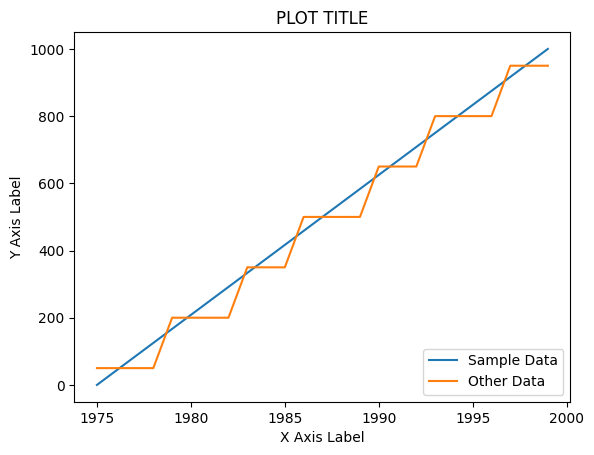

In [12]:
# Create more fake data
other_data = data - (data % 150) + 50

# Create the plot
fig, ax = plt.subplots()

# Plot both sets of data
ax.plot(years, data)
ax.plot(years, other_data)

# Add labels for x and y axes
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')

# Add a title for the plot
ax.set_title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
# Note there are 2 strings in the legend now
ax.legend(["Sample Data", "Other Data"], loc=4);

It is also possible to plot more than one kind of graph on the same axes. For example, this shows both a line graph and a scatter plot:

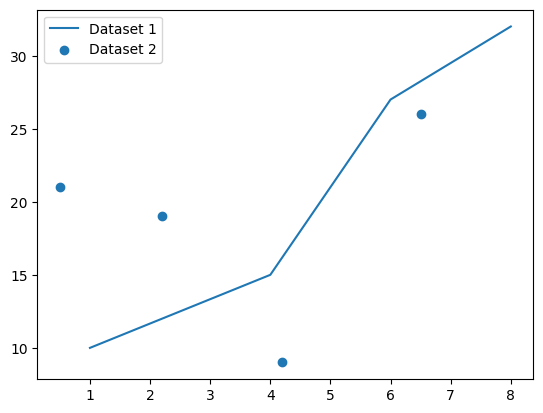

In [25]:
# Create fake data
x1 = [1, 4, 6, 8]
y1 = [10, 15, 27, 32]
x2 = [0.5, 2.2, 4.2, 6.5]
y2 = [21, 19, 9, 26]

# Create the plot
fig, ax = plt.subplots()

# Generate a line plot
ax.plot(x1, y1)

# Draw a scatter plot on same axes
ax.scatter(x2, y2)

# Add a legend
ax.legend(["Dataset 1", "Dataset 2"]);

Be careful when combining plots this way. Consider: *Do they really have the same x and y axis? Why do they need to be represented by two different kinds of plots?*

## Customizing Axes

For these examples, we'll start with this line plot showing an exponential curve:

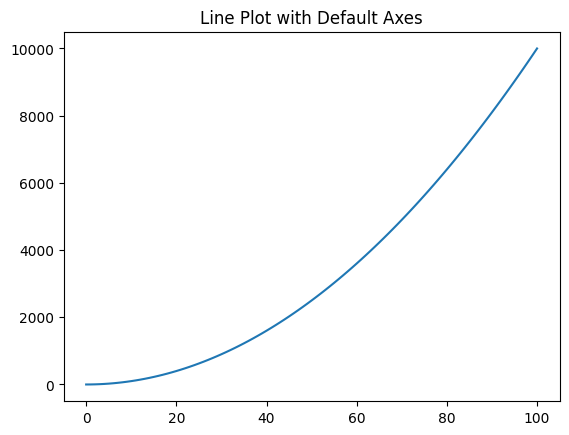

In [17]:
# Generate data
x = np.arange(101)
y = x**2

# Create the plot
fig, ax = plt.subplots()

# Draw a line graph
ax.plot(x,y)

# Set title to explain what we're doing
ax.set_title("Line Plot with Default Axes");

### Axis Limits

Sometimes it is helpful (or just aesthetically pleasing) to "zoom in" or "zoom out" of a plot. To do this, set the *limits* of the axes using `set_xlim(min,max)` and/or `set_ylim(min,max)`.

Here is the above graph "zoomed out" some, so there is more whitespace around the edges:

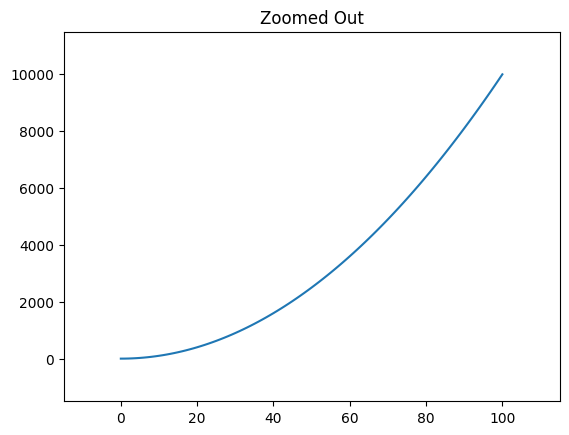

In [18]:
# Create plot, draw graph, set title
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title("Zoomed Out")

# Set the limits of x and y to "zoom out"
ax.set_xlim(min(x)-15, max(x)+15)
ax.set_ylim(min(y)-1500, max(y)+1500);

And here it is "zoomed in" so we are only looking at x values between 80 and 100:

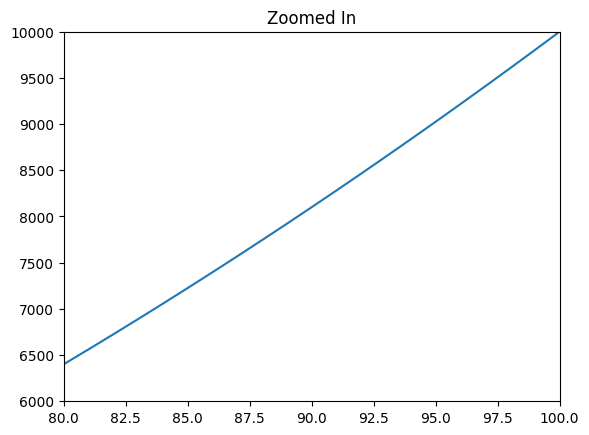

In [19]:
# Create plot, draw graph, set title
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title("Zoomed In")

# Set the limits of x and y to "zoom in"
ax.set_xlim(80, 100)
ax.set_ylim(6000, 10000);

## Axis Ticks

You've seen that you can change the limits of the x and y axes, but you can also change the scales and numbering of the ticks on the axes themselves. You do this via the `.set_xticks()` and `.set_yticks()` methods.

Let's change the default axes so there are 11 ticks on the x-axis 5 ticks on the y-axis. (This would be a relevant technique if more granularity is useful for the x-axis data than the y-axis data.)

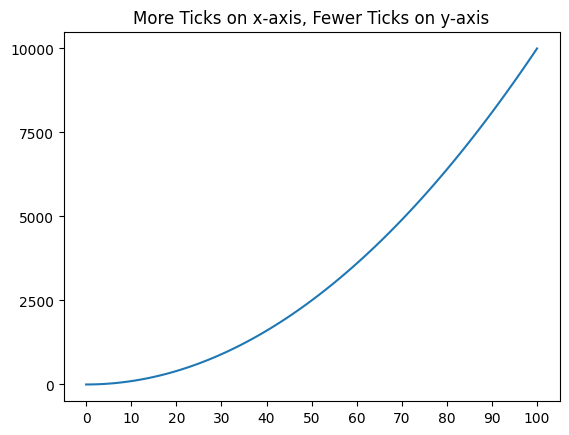

In [20]:
# Create plot, draw graph, set title
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title("More Ticks on x-axis, Fewer Ticks on y-axis")

# Customize the x and y axis ticks so x-axis has 11 and y-axis has 5
xticks = np.linspace(start=min(x), stop=max(x), num=11)
yticks = np.linspace(start=min(y), stop=max(y), num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks);

Axis ticks that go beyond the minimum and maximum of the data can make for poor graphs:

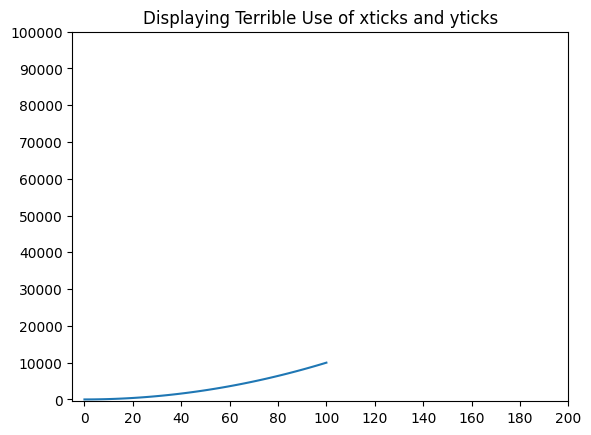

In [23]:
# Create plot, draw graph, set title
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Displaying Terrible Use of xticks and yticks')

# Customize the x and y axis ticks so the max tick is higher than the max data
xticks = np.linspace(start=min(x), stop=max(x)*2, num=11)
yticks = np.linspace(start=min(y), stop=max(y)*10, num=11)
ax.set_xticks(xticks)
ax.set_yticks(yticks);

But smaller tick ranges then the data itself will not crop the graph (use `set_xlim` and/or `set_ylim` to crop):

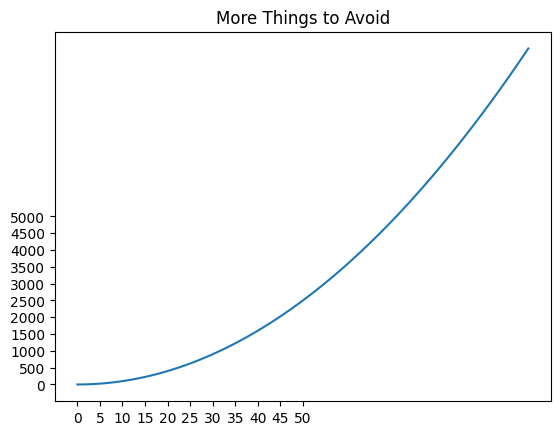

In [22]:
# Create plot, draw graph, set title
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('More Things to Avoid')

# Customize the x and y axis ticks so the max tick is smaller than the max data
xticks = np.linspace(start=min(x), stop=max(x)/2, num=11)
yticks = np.linspace(start=min(y), stop=max(y)/2, num=11)
ax.set_xticks(xticks)
ax.set_yticks(yticks);

### Customizing Line Styles

The `.plot` function takes additional parameters like `color`, `linewidth`, `linestyle` and `marker` etc. for customization of plots and to "prettify" them. A complete list of arguments can be viewed in the [official documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

For example, with the line graph + scatter plot example from above, here we have customized:

1. X and Y axis limits (to add some whitespace)
2. Color, width, and line style for the line graph
3. Color and marker style for the scatter plot

(Note that the legend automatically reflects the style of the plots.)

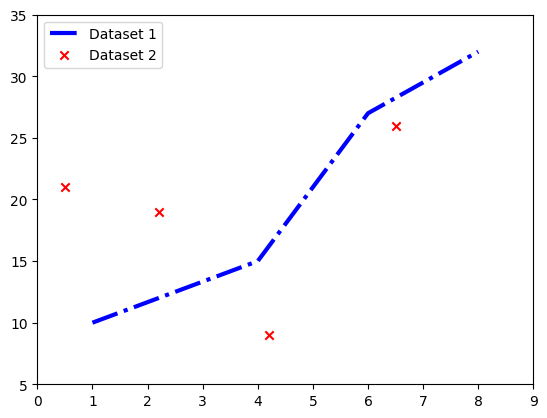

In [27]:
# Create the plot
fig, ax = plt.subplots()

# Set the limits of x and y axes
ax.set_xlim(0, 9), ax.set_ylim(5,35)

# Generate a line plot with custom styling
ax.plot(x1, y1, color='blue', linewidth=3, linestyle = '-.')

# Draw a scatter plot on same axes with custom styling
ax.scatter(x2, y2, color='red', marker='x')

# Add a legend
ax.legend(["Dataset 1", "Dataset 2"]);

The following plot summarizes different types of line styles you can draw in Matplotlib:

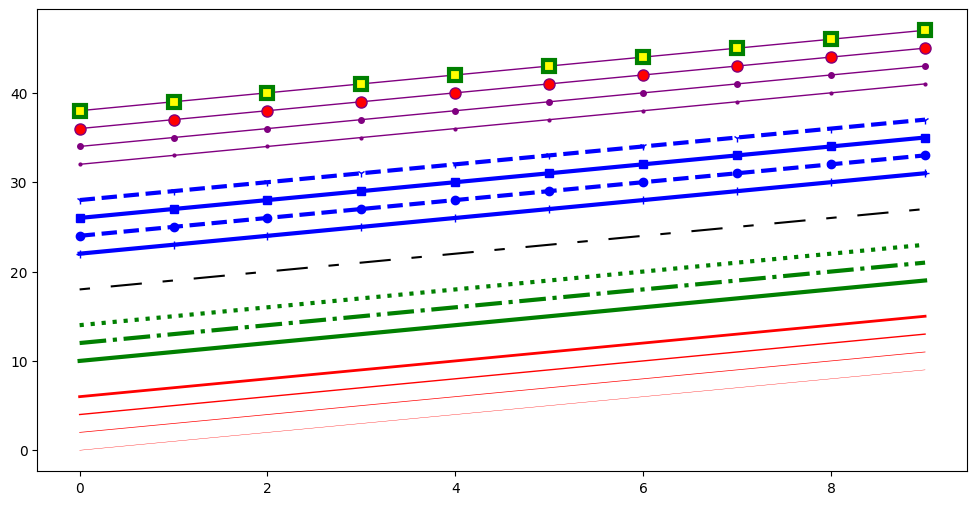

In [28]:
# Set up data and plot
x = np.arange(0, 10)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+4, color="red", linewidth=1.00)
ax.plot(x, x+6, color="red", linewidth=2.00)

# possible linestyle options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+10, color="green", lw=3, linestyle='-')
ax.plot(x, x+12, color="green", lw=3, ls='-.')
ax.plot(x, x+14, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+18, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+22, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+24, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+26, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+28, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+32, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+34, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+36, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+38, color="purple", lw=1, ls='-', marker='s', markersize=8, markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

## More `matplotlib` Objects

The structure of a plot in `matplotlib` can be generalized as shown below.  
![](https://curriculum-content.s3.amazonaws.com/data-science/images/gplot.png)

### Figure and Axes Objects
Looking at the above image, a **figure** is a top level component that refers to the overall image space. **Axes** are added to the figure to define the area where data is plotted with the `plot()` function seen above. A figure can have a number of components like **title(s)** which may be used to further explain and customize the plot.  Axes have **ticks** and **labels** providing a perspective to the plot.

In this example, we set the color of the figure to be gray and the color of the axes to be blue, to help visually distinguish them:

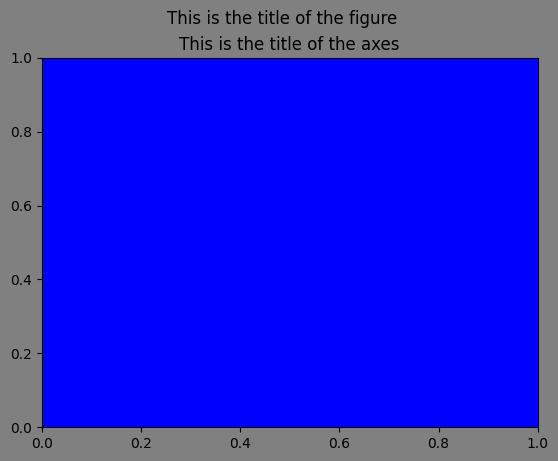

In [29]:
fig, ax = plt.subplots()

fig.set_facecolor("gray")
fig.suptitle("This is the title of the figure")

ax.set_facecolor("blue")
ax.set_title("This is the title of the axes");

### Sub-Plots

In all of the examples so far, we have used this syntax to create a single figure with a single axes:

```python
fig, ax = plt.subplots()
```

#### Rows and Columns

We can also create multiple axes (i.e. multiple subplots) within a single figure by specifying the `nrows` and/or `ncols` arguments.

For example, here we are creating 3 side-by-side axes within a figure:

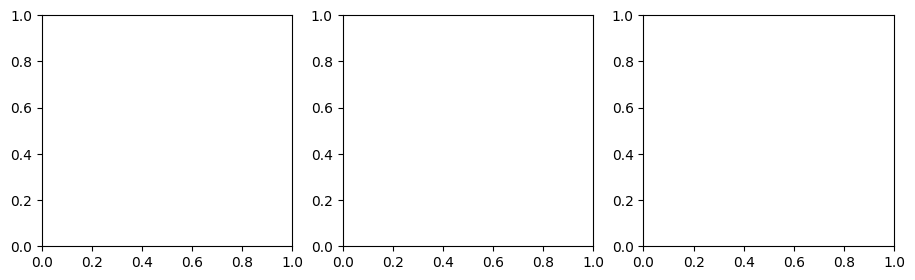

In [31]:
fig, axes = plt.subplots(figsize=(11, 3), ncols=3)

Here we have 3 axes stacked on top of one another:

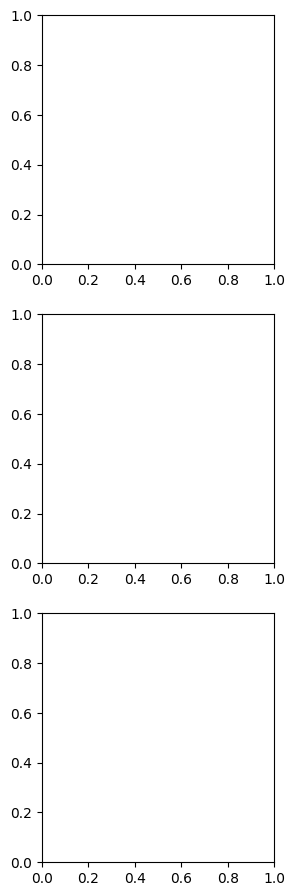

In [30]:
fig, axes = plt.subplots(figsize=(3, 11), nrows=3)

#### Customizing Individual Axes

If you try to apply methods like `set_facecolor` to this `axes` variable, you will get an error message:

In [32]:
axes.set_facecolor("orange")

AttributeError: 'numpy.ndarray' object has no attribute 'set_facecolor'

This is because `axes` is a collection of axes objects, not just one.

We can access an individual axes object like this:

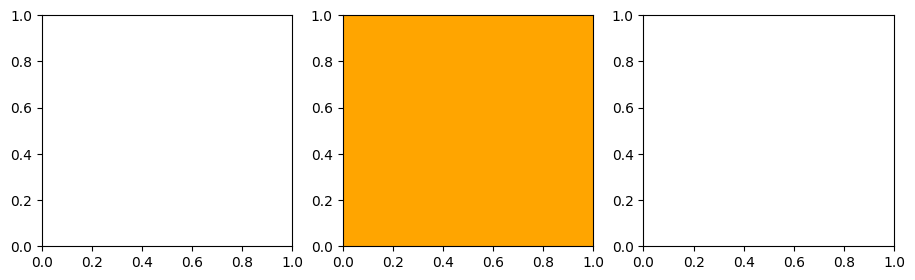

In [33]:
fig, axes = plt.subplots(figsize=(11, 3), ncols=3)
axes[1].set_facecolor("orange")

**Note:** `axes` is a collection of objects stored in a list-like data structure (a NumPy `ndarray`), and like other lists in Python it is "zero indexed": the "first" element in the list is selected with a 0, the "second" element selected with a 1, and so on.

Thus, in order to change the "middle" graph in the line of graphs, we change the "second" object stored in `axes`, by using `axes[1]`.

If we wanted to change the "first" graph, we would change the "first" object stored in axes, by using `axes[0]`.

Alternatively if we don't want to use this `axes[index]` notation every time we want to access a value from within a list, we can "unpack" each axes object into its own uniquely-named variable like this:

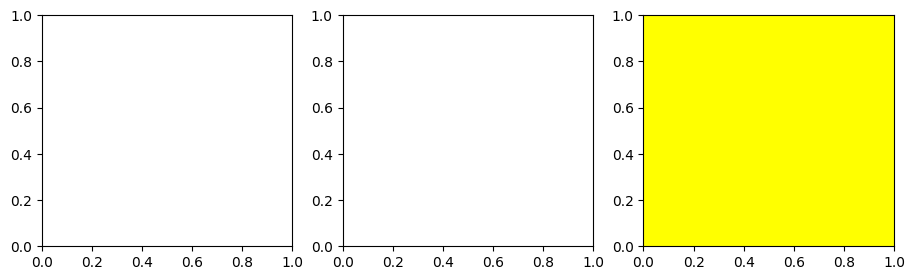

In [34]:
fig, (first_ax, second_ax, third_ax) = plt.subplots(figsize=(11, 3), ncols=3)
third_ax.set_facecolor("yellow")

Whether you use an `axes` variable or unpack the values is up to you — depending on the context of your code, either one might be the cleaner or clearer option.

### Alternative Techniques for Creating Figure and Axes

#### `.add_subplots` Technique

It is also possible to create a figure with `.figure` and add subplots to a figure after the figure has already been created using the `.add_subplots` method. This allows you to create subplots that take up more than one space in the grid.

(Don't worry if this syntax is confusing or you're not able to customize it; we are mainly demonstrating a different syntax that you might see in example code.)

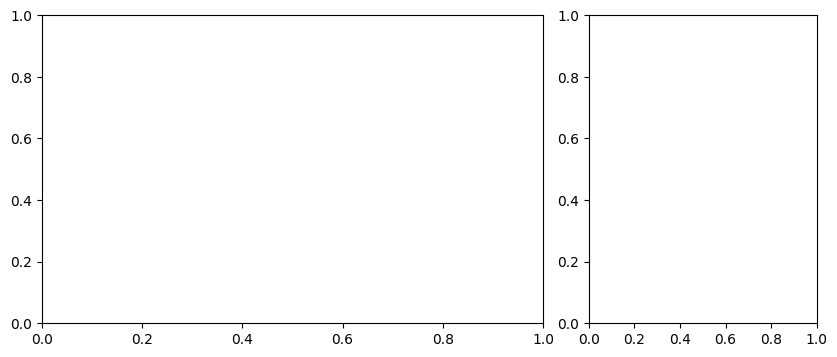

In [35]:
fig = plt.figure(figsize=(10,4))

# Each add_subplot starts with 1, 3 specifying 1 row and 3 cols
# Then the 3rd specifies which "cells" to fill, which are 1-indexed

# This axes fills the left 2/3rds, spanning cell 1 and 2
wide_axes = fig.add_subplot(1, 3, (1, 2))
# This axes fills the right 1/3rd, just filling cell 3
narrow_axes = fig.add_subplot(1, 3, 3)

# 1/3rd includes the axes labels, so the actual plotting area is
# not exactly 1/3rd

#### "PyPlot" Syntax

So far, all of these examples have used the "object-oriented" syntax, which is the preferred interface for Matplotlib. (The object-oriented syntax uses `fig, ax = plt.subplots()` or `fig = plt.figure()`.)

When you are looking at examples online, you might also encounter the "PyPlot" syntax.

This syntax does not create variables representing the figure and axes directly. Instead, it calls functions on `plt` (the alias we used to import PyPlot) directly with a "state machine" approach. This is a less-flexible technique but it is nevertheless popular in some circles, especially for programmers who are more familiar with MATLAB than Python. You may see examples of the PyPlot syntax in our lessons when we are creating quick graphs, where precise control of the graph is less important and we are just trying to produce an example with the fewest possible lines of code.

Recall the first plot in this lesson. The object-oriented syntax looked like this:

```python
# Create the plot
fig, ax = plt.subplots()

# Use plot() function to create a plot using above values
ax.plot(years, data)

# Add a legend to the plot
ax.legend(["Sample Data"]);
```

The PyPlot syntax to produce the same plot looks like this:

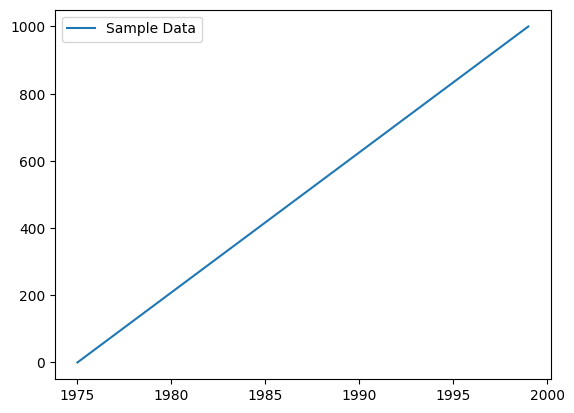

In [36]:
# You don't need to create the plot before adding the line

# Use plot() function to create a plot using above values
plt.plot(years, data)

# Add a legend to the plot
plt.legend(["Sample Data"]);

# You will often see this line in examples, but it isn't
# needed with %matplotlib inline
# plt.show()

Note that we saved 1 line of code by using this syntax in this example. However, say we want to reproduce this example:

```python
fig, axes = plt.subplots(figsize=(11, 3), ncols=3)
axes[1].set_facecolor("orange")
```

Now instead of just being able to use the `axes` variable, we have to call `plt.gcf().axes` in order to get the current figure and access its axes:

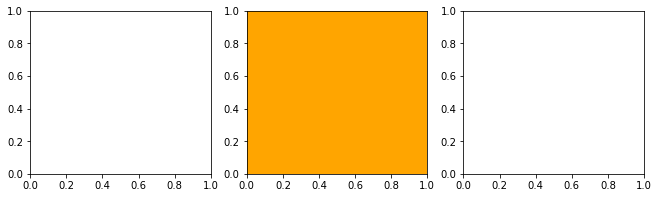

In [ ]:
plt.subplots(figsize=(11, 3), ncols=3)
plt.gcf().axes[1].set_facecolor("orange")

In general, you want to use the object-oriented syntax when possible, but it's useful to be able to recognize what's happening when you see examples that use the PyPlot syntax.

### Plotting with Subplots

Let's re-draw the above combined line plot and scatter plot in two different subplots.

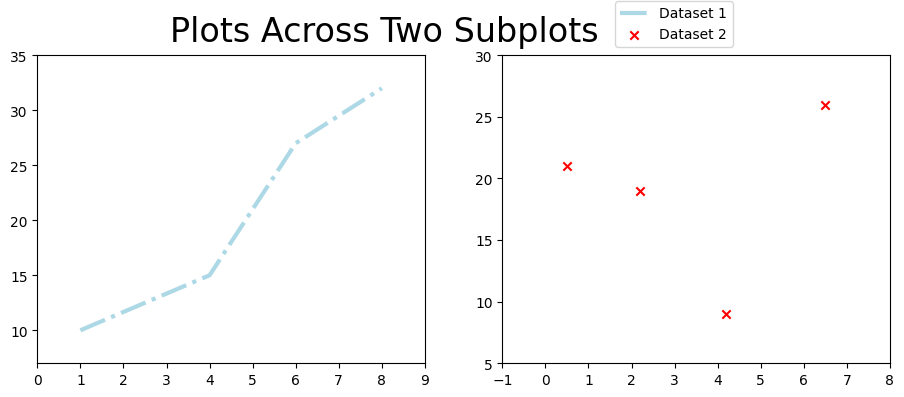

In [37]:
# Create the plot
fig, (ax1, ax2) = plt.subplots(figsize=(11,4), ncols=2)

# Set different limits of x and y axes for subplots
ax1.set_xlim(0, 9), ax1.set_ylim(7, 35)
ax2.set_xlim(-1, 8), ax2.set_ylim(5, 30)

# On one subplot, plot a line graph
ax1.plot(x1, y1, color='lightblue', linewidth=3, linestyle = '-.')

# On the other subplot, plot a scatter plot
ax2.scatter(x2, y2, color='red', marker='x')

# Add a title to the figure
fig.suptitle("Plots Across Two Subplots", fontsize=24, x=0.44)

# Add a legend to the figure
# (in general, these are quite nitpicky to style and position)
fig.legend(labels=["Dataset 1", "Dataset 2"], loc=(.68, .88));

Note that it is possible to recreate this using PyPlot syntax, it just makes many of the lines longer:

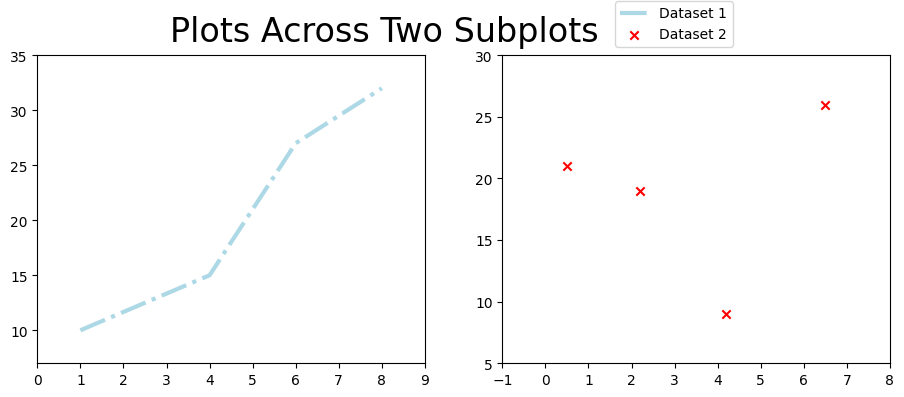

In [38]:
# Create the plot
plt.subplots(figsize=(11,4), ncols=2)

# Set the limits of x and y axes for both subplots
# If we wanted the same x and y limits for both, we could use:
# plt.xlim(0, 9)
# plt.ylim(5, 35)
plt.gcf().axes[0].set_xlim(0, 9), plt.gcf().axes[0].set_ylim(7, 35)
plt.gcf().axes[1].set_xlim(-1, 8), plt.gcf().axes[1].set_ylim(5, 30)

# On one subplot, plot a line graph
plt.gcf().axes[0].plot(x1, y1, color='lightblue', linewidth=3, linestyle = '-.')

# On the other subplot, plot a scatter plot
plt.gcf().axes[1].scatter(x2, y2, color='red', marker='x')

# Add a title to the figure
plt.gcf().suptitle("Plots Across Two Subplots", fontsize=24, x=0.44)

# Add a legend to the figure
plt.gcf().legend(labels=["Dataset 1", "Dataset 2"], loc=(.68, .88));

## More Subplots

You can also define a two-dimensional grid of subplots like this:

```python
fig, axes = plt.subplots(ncols=2, nrows=3) # 2 columns, 3 rows
```

From there, you can then plot on the individual subplots by accessing the subplot through the `axes` which is now 2-dimensional:

```python
top_left = axes[0][0]
top_right = axes[0][1]
row2_col1 = axes[1][0]
row2_col2 = axes[1][1]
row3_col1 = axes[2][0]
row3_col2 = axes[2][1]
```

It is possible to loop over these indices more succinctly using floor division and modular arithmetic in a for loop:

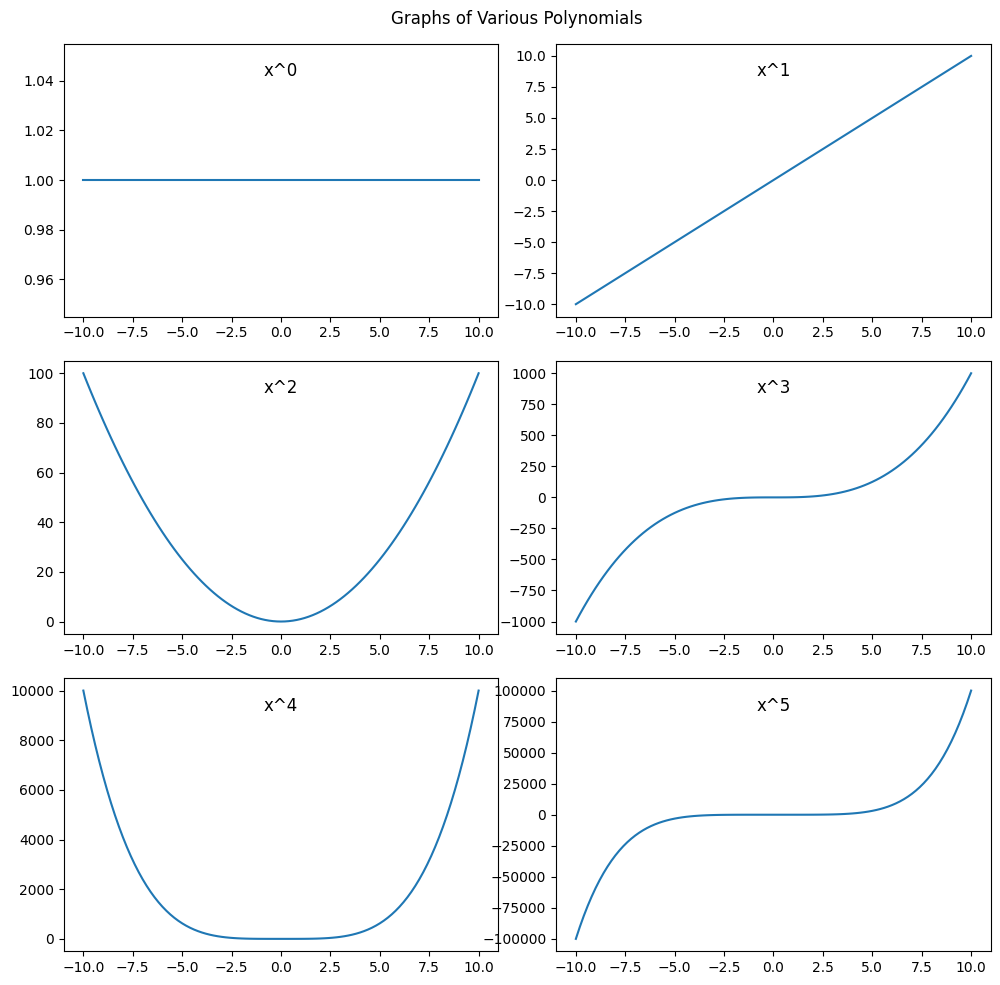

In [39]:
# Set up fake data and figure
x = np.linspace(-10, 10, 101)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
fig.suptitle('Graphs of Various Polynomials')
fig.tight_layout()

for n in range(6):
    # Find the relevant subplot
    row = n//2 # n divided by 2 without the remainder
    col = n%2  # just the remainder of n divided by 2
    ax = axes[row][col]

    # Plot x to the power of n
    y = x**n
    ax.plot(x,y)
    ax.set_title('x^{}'.format(n), y=0.85)

## Other Plotting Functions in `matplotlib`

In this lesson, we used `ax.scatter()` for generating a scatter plot and `ax.plot()` for generating a line plot. The following is a list of other similar functions which can be readily used for visualizing data:

    .plot()           Line plot
    .scatter()        Scatter plot
    .bar()	        Vertical bar graph
    .barh()	       Horizontal bar graph
    .axhline()	    Horizontal line across axes
    .vline()	      Vertical line across axes
    .stackplot()	  Stack plot
    
You'll learn more about these functions in upcoming labs and lessons, and you can find more information in the [Matplotlib axes documentation](https://matplotlib.org/api/axes_api.html#plotting).

## Summary

This lesson provided you with some more experience with plotting in `matplotlib`. We introduced line plots, an additional type of plot used for two-dimensional data. Then the lesson demonstrated how to customize the axes and line style. Next, the lesson dove into the details of figures, axes, and techniques for drawing multiple plots within the same figure. The lesson then ended by providing a quick reference list of further plotting functions.